In [83]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model


In [84]:
os.chdir('U:\\ProjectDataset')

In [85]:
dt=pd.read_excel('PCA_LUAD_L.xlsx')  #import data set

In [86]:
tar=pd.read_excel('survival_LUAD.xlsx') #target variable

In [95]:
import numpy as np
from sklearn import linear_model

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
Y=tar

In [98]:
#split the data to 70/30 percentage 
X_train,X_test,Y_train,Y_test=train_test_split(dt,Y,test_size=0.3,random_state=42)
print(X_train.shape,Y_train.shape)           
print(X_test.shape,Y_test.shape)

(361, 16) (361, 1)
(156, 16) (156, 1)


In [99]:
#Applying Linear Regression
lm=linear_model.LinearRegression()
model=lm.fit(X_train,Y_train)
predictionss=lm.predict(X_test)

In [100]:
#First 5 predictions of the target variable (Survival rate)
predictionss[0:5]

array([[20.93565094],
       [26.486089  ],
       [50.52820622],
       [17.96055944],
       [21.21337451]])

In [101]:
model.score(X_test,Y_test)      
# Accuracy of the model (Test Data set)

0.8637598777456076

In [102]:
# Accuracy of the training data set 
model.score(X_train,Y_train)

0.8136355375666193

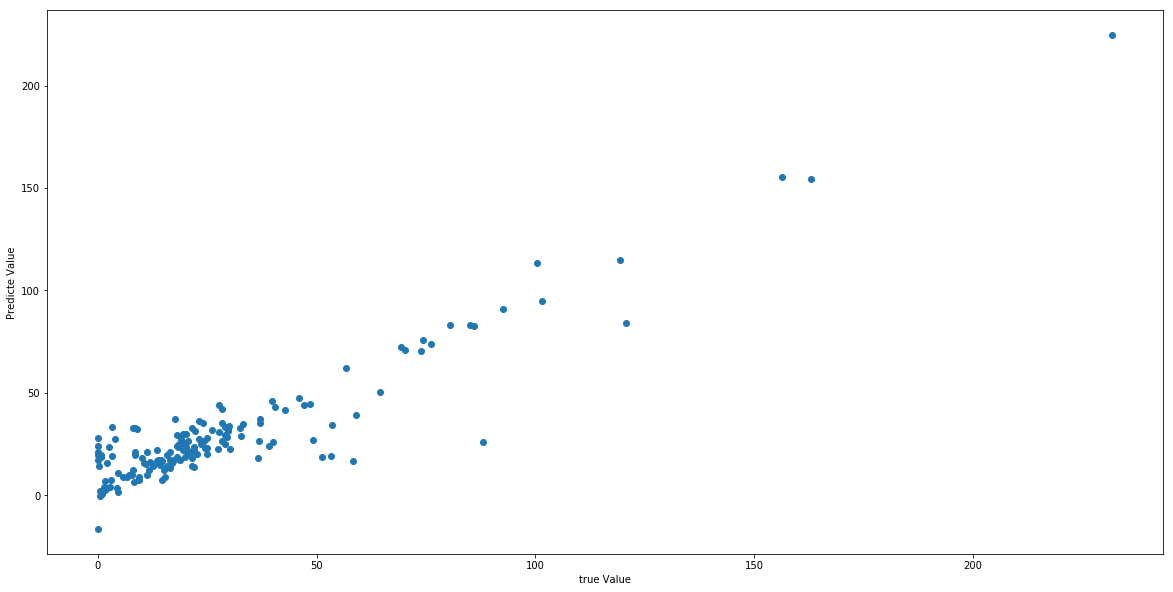

In [117]:
#Visualizing the predictions
plt.figure(figsize=(20,10))
plt.xlabel('true Value')
plt.ylabel('Predicte Value')
plt.scatter(Y_test,predictionss)


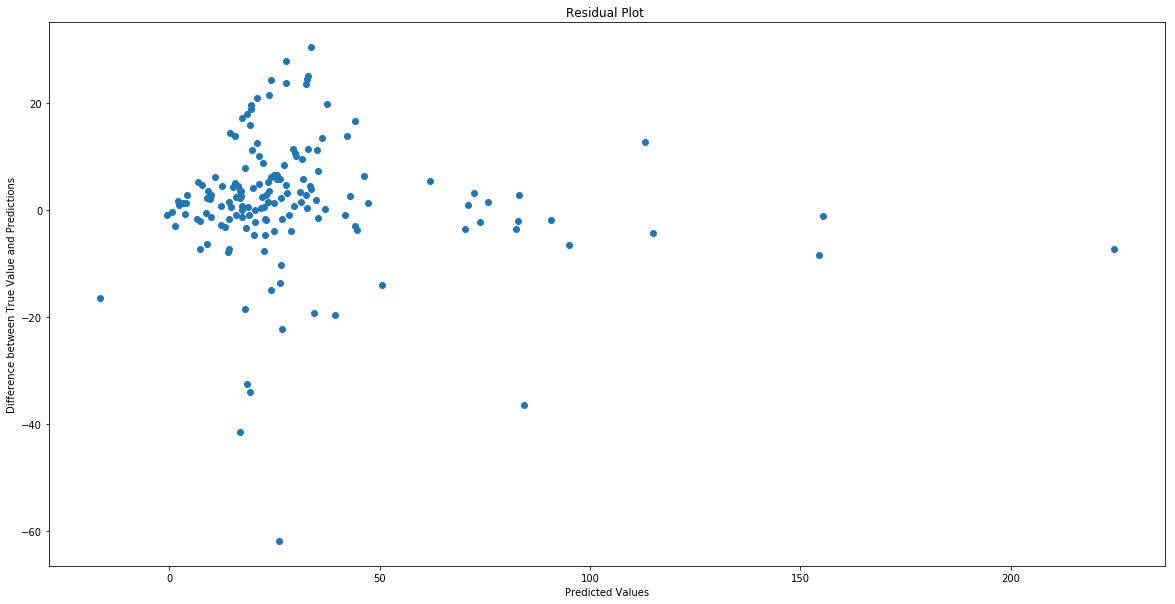

In [119]:
plt.figure(figsize=(20,10))
plt.title('Residual Plot ')
plt.ylabel('Difference between True Value and Predictions')
plt.xlabel('Predicted Values')
x_plot=plt.scatter(predictionss,(predictionss-Y_test)) 
#plt.hlines(y=0,xmin=-1000,xmax=5000)


In [120]:
from sklearn import metrics

In [121]:
from sklearn.metrics import mean_squared_error

In [122]:
rm=np.sqrt(mean_squared_error(Y_test,predictionss))
print(rm) 

12.18579705062396


In [124]:
c=lm.coef_.flatten()

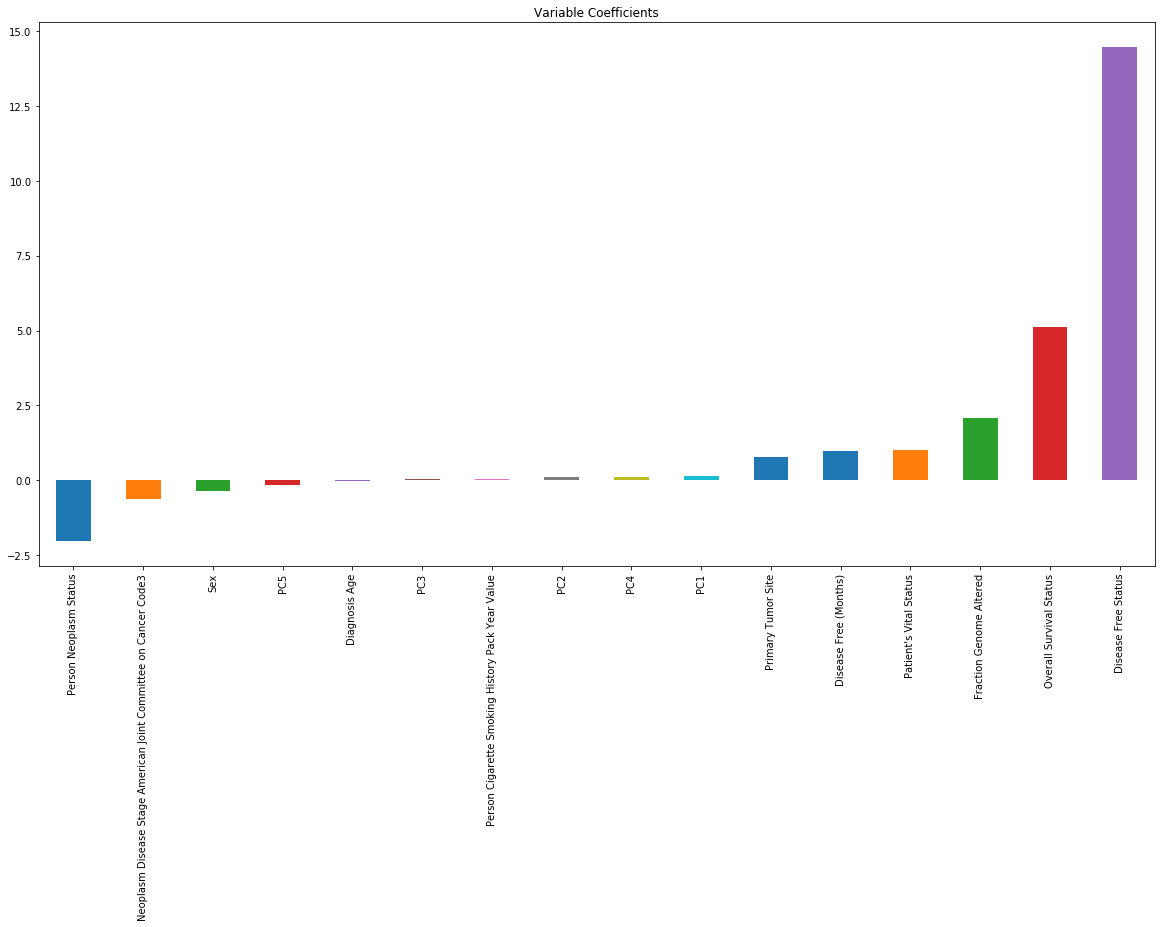

In [125]:
from pandas import Series
predictors=X_train.columns
plt.figure(figsize=(20,10))
plt.title('Variable Coefficients')
coef=Series(c,predictors).sort_values()
coef.plot(kind='bar')

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
rm=np.sqrt(mean_squared_error(Y_test,predictionss))

In [110]:
print(rm)

12.18579705062396


In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
cv_scores=cross_val_score(reg,X_test,Y_test,cv=6)
print(cv_scores)

[0.68626595 0.85574931 0.4793686  0.92623649 0.65199587 0.93178789]


In [113]:
print(np.mean(cv_scores))

0.7552340194970842


In [114]:
cv_scores=cross_val_score(reg,X_test,Y_test,cv=3)
print(cv_scores)
print(np.mean(cv_scores))

[0.76492625 0.84998302 0.85848051]
0.8244632609767786


In [115]:
cv_scores=cross_val_score(reg,X_test,Y_test,cv=10)
print(cv_scores)
print(np.mean(cv_scores))

[ 0.64625245  0.90463519  0.6762958   0.49383517 -0.24418786  0.94184337
  0.71563774  0.74207693  0.57105145  0.98302034]
0.643046057818718
